In [7]:
import pandas as pd
import glob
import datetime as dt

In [54]:
# Obtain filenames.
filenames = [i for i in glob.glob('../data/interventions/clean-with-texts/*.csv')]

# Get all files as dataframes in pandas.
files = []
for i in range(0, len(filenames)):
    files.append(pd.read_csv(filenames[i]))

# Combine all files.
concatenated = pd.concat(files).reset_index(drop=True)

In [55]:
concatenated.text.dropna()

0         Gracias, presidenta. Buenas tardes ya, señoría...
1         Puro teatro, señor Sánchez, puro teatro es lo ...
2         Gracias, señora presidenta. Quisiera, señoría,...
3         Señorías, buenas tardes, bona tarda. Es la pri...
4         Muchas gracias, señora presidenta. Señor Sánch...
                                ...                        
235066    Gracias, señor presidente. Intervengo quizás e...
235067    Gracias, señor presidente. Nuestro grupo parla...
235068    Muchas gracias, señor presidente. Señor vicepr...
235069    Gracias, señor presdente. Señorías, que estemo...
235070    Señor presdente, señor Solbes, señoras y señor...
Name: text, Length: 90964, dtype: object

In [56]:
# Descriptive analysis dataset:
# 1. Merge namings that correspond to the same political parties.
    # Removed representatives from the Parlamento de Galicia.
    # Removed representatives from the Senate.
    # Removed minor parties that are not relevant or in which time series does not continue through time.

group_merger = {
    # UP & Co.
    'GCUP-EC-GC': 'UP',
    'GCUP-EC-EM': 'UP',
    'GP-EC-EM': 'UP',

    # IU.
    'GIU': 'IU',
    'GIU-IU-ICV': 'IU',
    'GIP': 'IU',
    'GIU-ICV': 'IU',
    'IULV-CA': 'IU',

    # PP.
    'GP': 'PP',     
    'PPC': 'PP',

    'GS': 'PSOE',   # PSOE.
    'GCs': 'CS',    # Ciudadanos.
    'GVOX': 'VOX',  # Vox.
    'GC-CiU': 'CIU',  # CIU.

    # PNV.
    'GV-PNV': 'PNV',
    'GV (EAJ-PNV)': 'PNV',

    # EH Bildu.
    'GEH Bildu': 'EHB',

    # ERC.
    'GER-IU-ICV': 'ERC', # Since it was mostly ERC and almost no IU.
    'GR': 'ERC',
    'GER': 'ERC',
    'ERC': 'ERC',
    'GER-ERC': 'ERC'}

groups = ['UP', 'IU', 'PP', 'PSOE', 'CS', 'VOX', 'PNV', 'EHB', 'ERC', 'CIU']
concatenated['political_group'] = concatenated['political_group'].replace(group_merger)


In [60]:
concatenated = concatenated.loc[concatenated.political_group.isin(groups)].reset_index(drop=True)


In [62]:
concatenated.text.dropna()

0         Gracias, presidenta. Buenas tardes ya, señoría...
1         Puro teatro, señor Sánchez, puro teatro es lo ...
2         Gracias, señora presidenta. Quisiera, señoría,...
3         Señorías, buenas tardes, bona tarda. Es la pri...
4         Muchas gracias, señora presidenta. Señor Sánch...
                                ...                        
163520    Gracias, señor presidente. Intervengo quizás e...
163521    Gracias, señor presidente. Nuestro grupo parla...
163522    Muchas gracias, señor presidente. Señor vicepr...
163523    Gracias, señor presdente. Señorías, que estemo...
163524    Señor presdente, señor Solbes, señoras y señor...
Name: text, Length: 68872, dtype: object

In [65]:
# 1. Count the amount of interventions per political party.
concatenated.groupby('political_group').count()

,legislatura,fecha,objeto_iniciativa,numero_expediente,autores,nombre_sesion,orador,enlace_pdf,text
political_group,,,,,,,,,
CIU,14206,14206,14206,14206,14206,14206,14206,14206,4465
CS,9305,9305,9305,9305,9305,9305,9305,9305,4760
EHB,1493,1493,1493,1493,1493,1493,1493,1493,841
ERC,10083,10083,10083,10083,10083,10083,10083,10083,4699
IU,7974,7974,7974,7974,7974,7974,7974,7974,2628
PNV,12030,12030,12030,12030,12030,12030,12030,12030,5179
PP,45670,45670,45670,45670,45670,45670,45670,45670,18531
PSOE,43750,43750,43750,43750,43750,43750,43750,43750,18043
UP,11811,11811,11811,11811,11811,11811,11811,11811,6131


In [76]:
count_of_interventions = concatenated.groupby('orador')['orador','text'].count()


/var/folders/ct/921g5yd903j7f8wh5k85dltr0000gn/T/ipykernel_28034/1091119824.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  count_of_interventions = concatenated.groupby('orador')['orador','text'].count()


Text(0, 0.5, 'Amount of MPs')

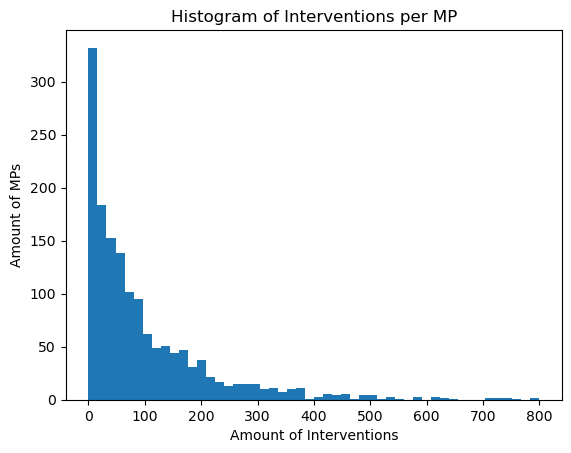

In [113]:
import matplotlib.pyplot as plt
plt.hist(count_of_interventions['orador'].tolist(), range = [0, 800], bins = 50)
plt.title('Histogram of Interventions per MP')
plt.xlabel('Amount of Interventions')
plt.ylabel('Amount of MPs')

In [125]:
# Export.
concatenated.to_csv("../data/final/legislatures-7-to-14-with-parsed-texts.csv", index=False)